<a href="https://colab.research.google.com/github/Wessbejaoui/PA5_1/blob/main/Capstone_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chicago TNP Ride Data: Exploratory Data Analysis (EDA)
This notebook performs EDA on the Transportation Network Provider (TNP) trip data from Chicago (2018–2022).

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
# 2. Load data
df = pd.read_csv("sample_data/diabetes_dataset_with_notes.csv")
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [17]:
# 3. Dataset overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [18]:
# 4. Descriptive statistics
df.describe()


,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [19]:
df_clean = df.copy()

In [20]:
# Drop columns I won't use for now. drop clinical_notes (text data)
df_clean = df_clean.drop(columns=['clinical_notes'])

In [21]:
# Feature Engineering. Create 'high_glucose' flag (based on glucose level threshold)
df_clean['high_glucose'] = (df_clean['blood_glucose_level'] > 140).astype(int)

In [22]:
# One-hot encode categorical features
categorical_cols = ['gender', 'location', 'smoking_history']
numeric_cols = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']

In [23]:
# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

In [24]:
# I apply the transformation
X_transformed = preprocessor.fit_transform(df_clean)

# Get the shape of transformed data
X_transformed_shape = X_transformed.shape

X_transformed_shape

(100000, 78)

This is the shape of the cleaned and transformed dataset:

* 100000 rows → You have 100,000 patient records
* 78 columns (features) → These are the final input variables after:

1.   Standardizing numerical variables (age, bmi, etc.)
2.   Keeping binary features like hypertension, heart_disease, race flags
3.   One-hot encoding categorical variables (gender, location, smoking_history)
4.   Adding the new engineered feature: high_glucose


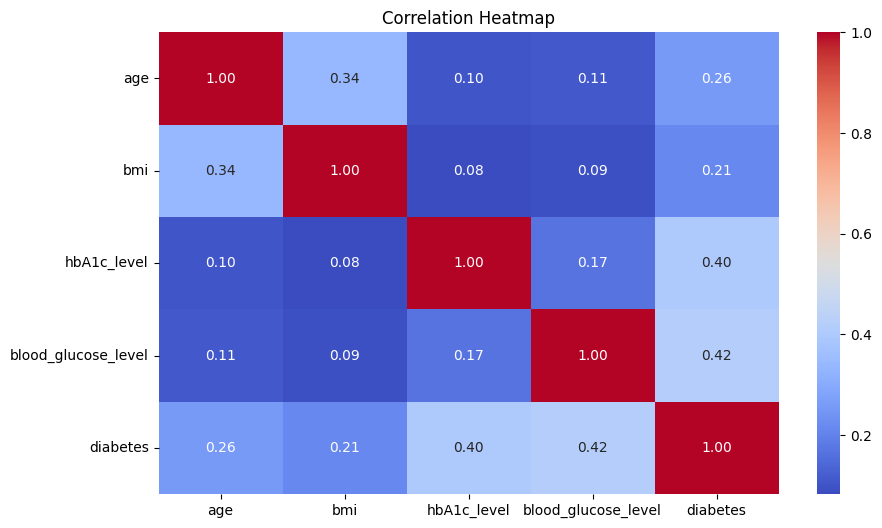

In [25]:
# Select numeric columns for visualization
numeric_features = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']

# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df_clean[numeric_features + ['diabetes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- hbA1c_level and blood_glucose_level show the strongest positive correlation with diabetes, which is expected as these are key indicators of blood sugar control.
- age and bmi also show positive correlations with diabetes, suggesting that older individuals and those with higher BMI are more likely to have diabetes.
- The correlations between the numerical features themselves (e.g., age and bmi) are relatively weak, indicating that these features provide somewhat independent information.

| Feature                   | Correlation with `diabetes`         |
| ------------------------- | ----------------------------------- |
| **blood\_glucose\_level** | **0.42** → Strongest predictor      |
| **hbA1c\_level**          | **0.40** → Clinically accurate      |
| **age**                   | 0.26 → Older patients = higher risk |
| **bmi**                   | 0.21 → Mild correlation             |


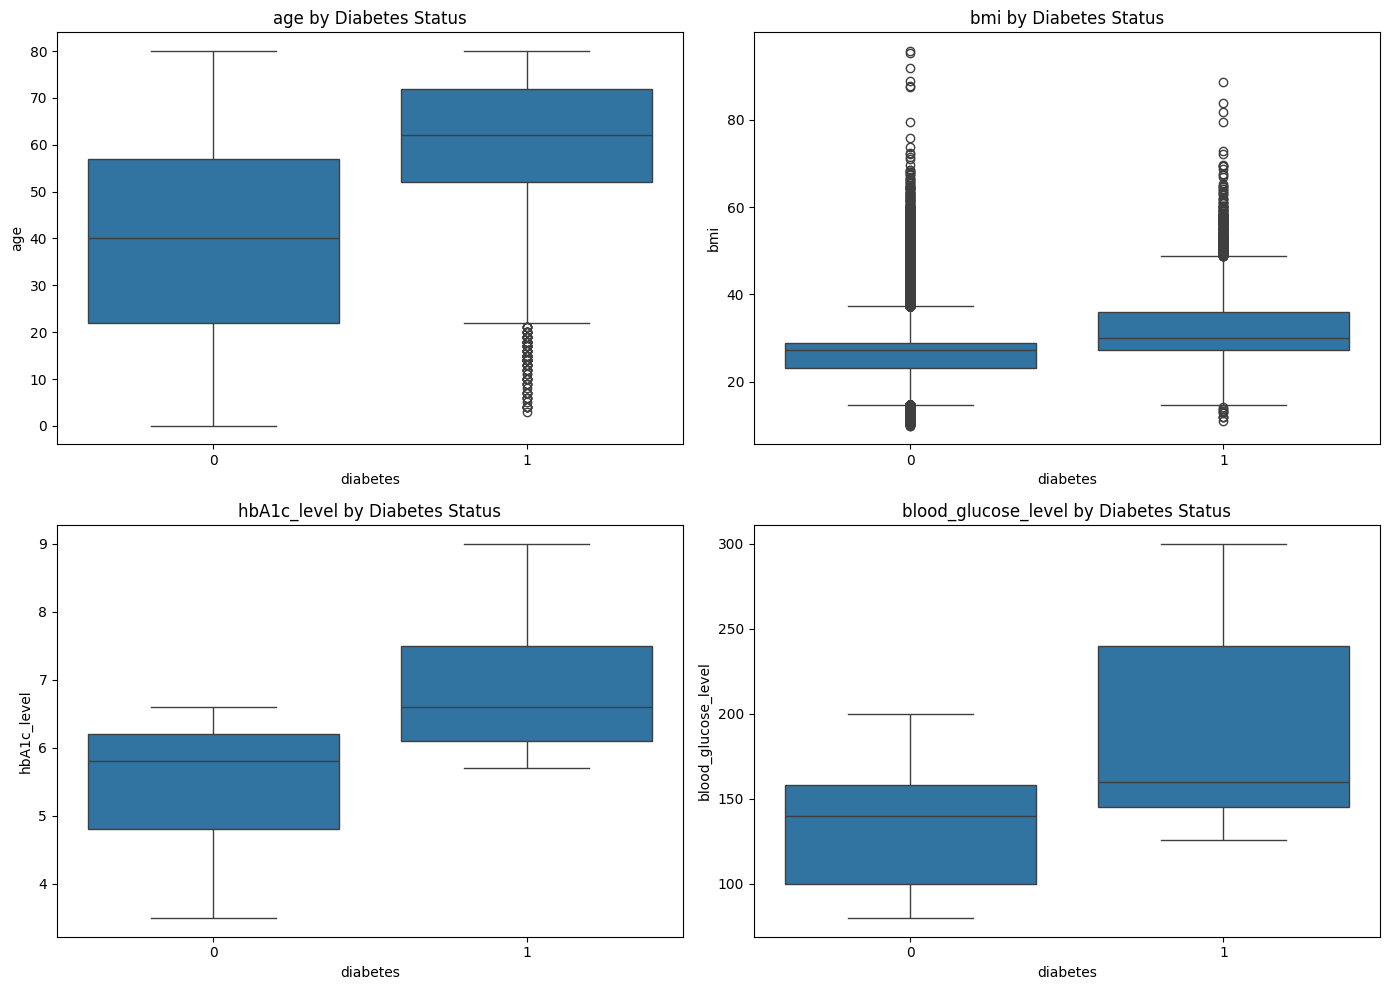

In [26]:
# Boxplots to detect outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, feature in zip(axes.ravel(), numeric_features):
    sns.boxplot(data=df_clean, x='diabetes', y=feature, ax=ax)
    ax.set_title(f'{feature} by Diabetes Status')
plt.tight_layout()
plt.show()

- The boxplots clearly show that individuals with diabetes (diabetes=1) tend to have significantly higher values for age, bmi, hbA1c_level, and blood_glucose_level compared to individuals without diabetes (diabetes=0).
- There are outliers present in the age and bmi features for both diabetes and non-diabetes groups.

blood_glucose_level:

- Non-diabetic: mostly under 140

- Diabetic: values spread wide, many >200 → heavy right skew and outliers

hbA1c_level:

- Diabetic group has higher medians (>6.5)

BMI:

- Wide spread in both groups; some values >60 or even 90 are extreme

Age:

- Expected range, but a few cases near 0 suggest infant entries (worth checking)

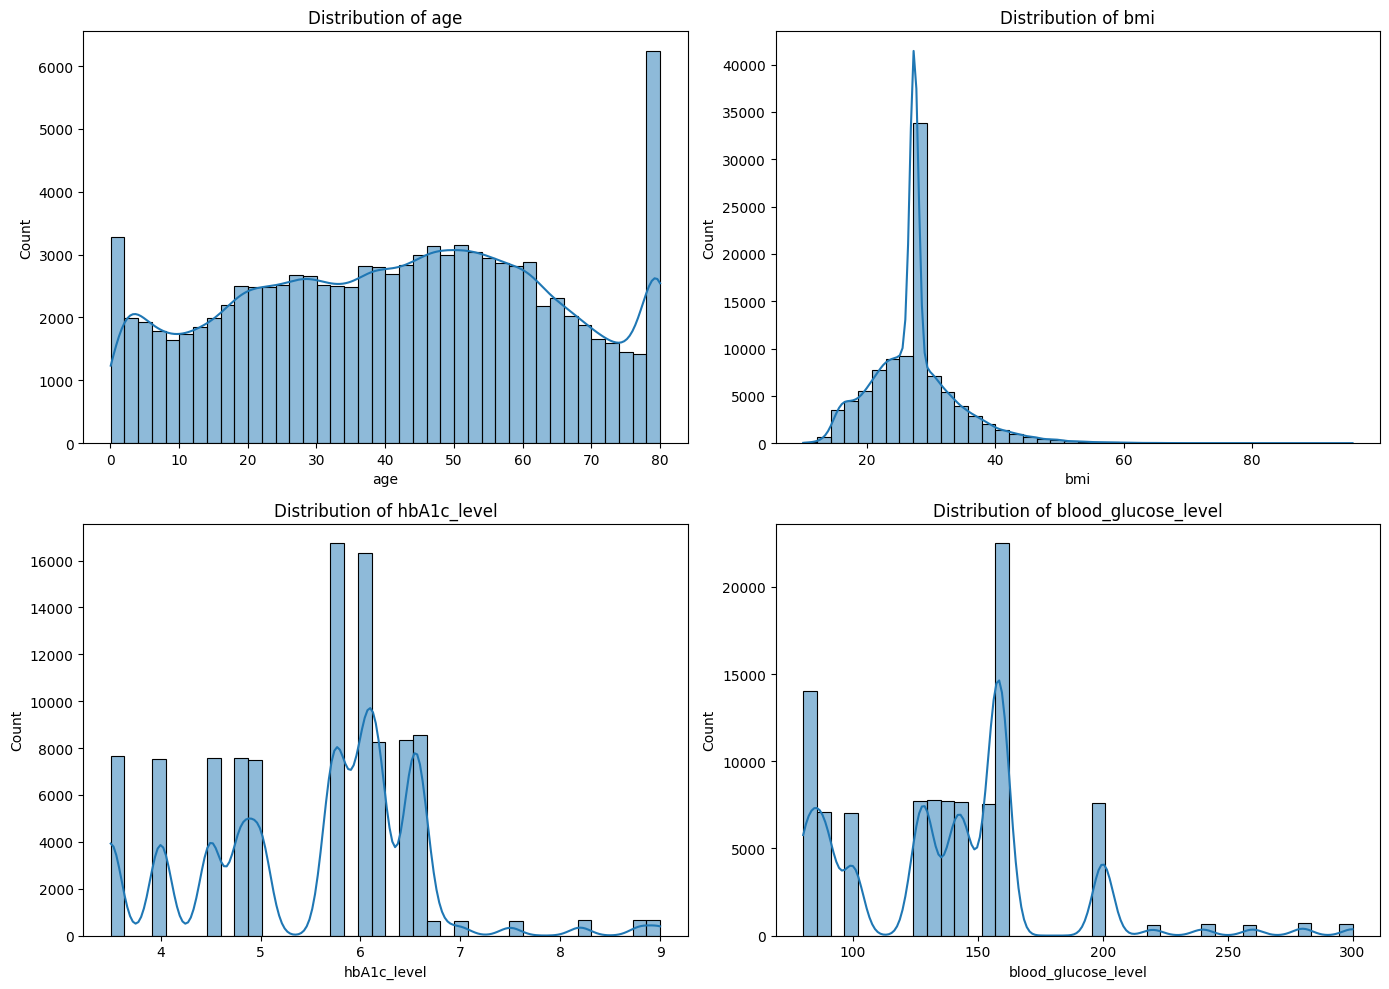

In [27]:
# Distributions (Histograms)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, feature in zip(axes.ravel(), numeric_features):
    sns.histplot(df_clean[feature], kde=True, bins=40, ax=ax)
    ax.set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

- The distribution of age appears somewhat bimodal, with peaks around younger and older age groups.
- BMI and glucose are right-skewed. The BMI distribution is skewed to the right, indicating a higher frequency of lower BMI values and a tail extending towards higher BMI values.
- The hbA1c_level and blood_glucose_level distributions show multiple peaks, suggesting potential groupings or thresholds within these levels related to diabetes status.HbA1c is relatively normal with a peak ~5.5

Overall, the visuals support the understanding that age, bmi, hbA1c_level, and blood_glucose_level are important factors associated with diabetes in this dataset. The boxplots highlight the clear separation in these features between the two diabetes groups, and the histograms provide insights into the distribution patterns of the individual features.